In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import display, HTML

CSS = """
div.cell:nth-child(5) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [2]:
#Loading Dataset and having a look at the first four rows
df=pd.read_csv('/home/sanchit/Sanchit/Data_Science/Visualisation/AppleStore.csv')
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [4]:
# Number of Unique Values that each column takes 
df.nunique()

Unnamed: 0          7197
id                  7197
track_name          7195
size_bytes          7107
currency               1
price                 36
rating_count_tot    3185
rating_count_ver    1138
user_rating           10
user_rating_ver       10
ver                 1590
cont_rating            4
prime_genre           23
sup_devices.num       20
ipadSc_urls.num        6
lang.num              57
vpp_lic                2
dtype: int64

Total number of apps is 7197. There are only 36 price values for apps and all are in USD. 23 prime genres are available. User rating has 10 distinct values. 

In [5]:
# Count of unique values for Price, User rating and User Rating_ver
display(df['price'].value_counts().sort_index())
display(df['user_rating'].value_counts().sort_index())
display(df['user_rating_ver'].value_counts().sort_index())

0.00      4056
0.99       728
1.99       621
2.99       683
3.99       277
4.99       394
5.99        52
6.99       166
7.99        33
8.99         9
9.99        81
11.99        6
12.99        5
13.99        6
14.99       21
15.99        4
16.99        2
17.99        3
18.99        1
19.99       13
20.99        2
21.99        1
22.99        2
23.99        2
24.99        8
27.99        2
29.99        6
34.99        1
39.99        2
47.99        1
49.99        2
59.99        3
74.99        1
99.99        1
249.99       1
299.99       1
Name: price, dtype: int64

0.0     929
1.0      44
1.5      56
2.0     106
2.5     196
3.0     383
3.5     702
4.0    1626
4.5    2663
5.0     492
Name: user_rating, dtype: int64

0.0    1443
1.0     125
1.5      74
2.0     136
2.5     176
3.0     304
3.5     533
4.0    1237
4.5    2205
5.0     964
Name: user_rating_ver, dtype: int64

In [6]:
display(df['prime_genre'].value_counts())

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

### Observations:

1. More than 50% of apps are free and should be treated differently. 
2. Apps which costs more than 30 USD can be treated as super expensive and are outliers in our data. 
3. User Ratings are on a scale of 5.
4. 'Games', 'Entertainment', 'Education' and 'Photo and Video' are the four most important and popular genre with      each having more than 300 apps. Games has exceptionally high number of apps (> 3000)

In [7]:
#Combining all the genre other than 4 most popular into one for easy analysis
other_genre_array=df['prime_genre'].value_counts().index[4:]
df1=df
df['genre']=['Others' if item in other_genre_array else item for item in df['prime_genre']]
display(df['genre'].value_counts())

Games            3862
Others           1998
Entertainment     535
Education         453
Photo & Video     349
Name: genre, dtype: int64

In [8]:
#Decreasing the range of rating count
df['log_rating_count']=np.log10(df['rating_count_tot'])
#Giving a label of free or paid to each app
df['cost']=['free' if item==0 else 'paid' for item in df['price']]
#Dividing dataset into three parts: free apps, paid apps and super expensive apps(outliers)
free_apps=df[df.price==0]
outlier=df[df.price>30][['track_name','size_bytes','price','prime_genre','user_rating','rating_count_tot']]
paid_apps=df[((df.price>0) & (df.price<30))]
display(outlier)

/home/sanchit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


,track_name,size_bytes,price,prime_genre,user_rating,rating_count_tot
115,Proloquo2Go - Symbol-based AAC,723764224,249.99,Education,4.0,773
162,NAVIGON Europe,144412672,74.99,Navigation,3.5,927
778,プチ・ロワイヤル仏和辞典（第4版）・和仏辞典（第3版）,205664256,47.99,Reference,0.0,0
1136,Articulation Station Pro,425919488,59.99,Education,4.5,294
1479,LAMP Words For Life,583263232,299.99,Education,4.0,41
1688,Cubasis 2 - Mobile Music Creation System,1032812544,49.99,Music,4.0,297
2181,Articulation Test Center Pro,174737408,59.99,Education,4.5,29
2405,KORG Gadget,918957056,39.99,Music,4.5,1297
2568,KNFB Reader,106429440,99.99,Productivity,4.5,71
3012,Anatomy & Physiology: Body Structures and Func...,1758696448,34.99,Medical,4.5,49


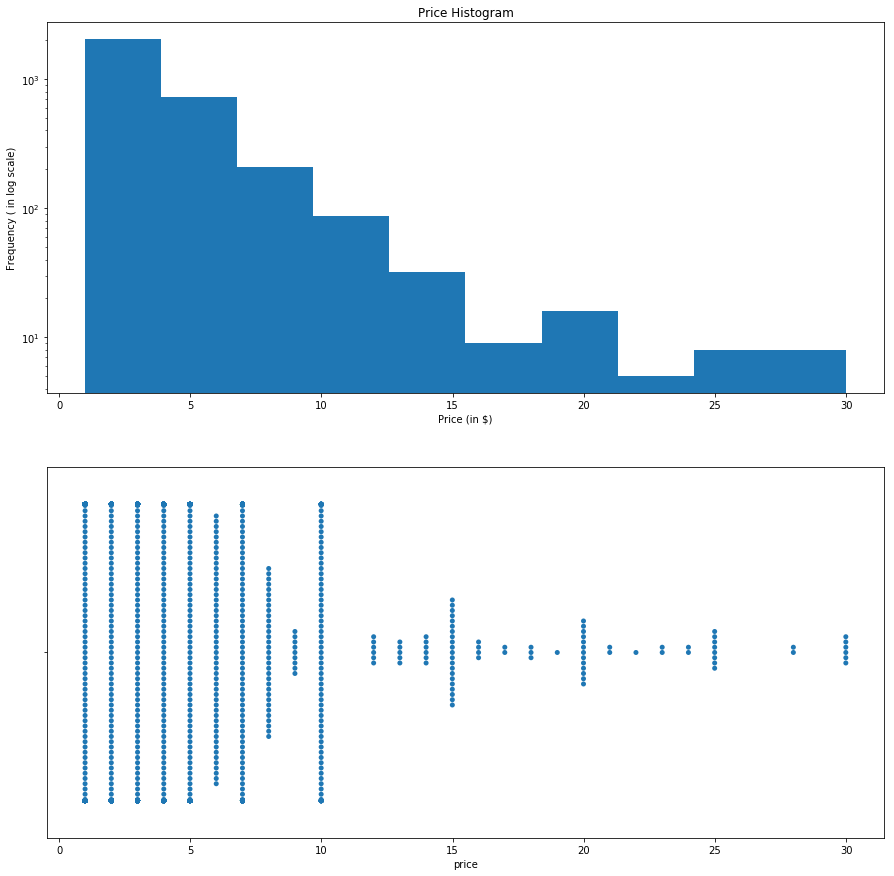

In [9]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
plt.hist(paid_apps['price'],log=True)
plt.title('Price Histogram')
plt.ylabel("Frequency ( in log scale)")
plt.xlabel("Price (in $)")

plt.subplot(2,1,2)
sns.swarmplot(x=paid_apps['price'], data=paid_apps)

### Observations:
1. The frequency of paid apps decreases exponentially with the increasing price. 
2. Also, there are very less apps having cost more than 10$.

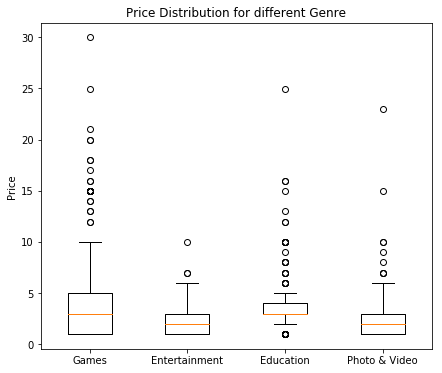

In [11]:
games_data = paid_apps[paid_apps.prime_genre=='Games']
entertainment_data = paid_apps[paid_apps.prime_genre=='Entertainment']
education_data = paid_apps[paid_apps.prime_genre=='Education']
photo_video_data = paid_apps[paid_apps.prime_genre=='Photo & Video']

plt.figure(figsize=(7,6))
plt.title('Price Distribution for different Genre')
plt.ylabel('Price')
plt.boxplot([games_data['price'],entertainment_data['price'],education_data['price'],photo_video_data['price']])
plt.xticks([1,2,3,4],['Games','Entertainment','Education','Photo & Video']);

### Observations:

1. Since the box plot for 'Games' is widely spread as compared to other genre apps, it gives an idea that the gaming apps are highly priced. 
2. The price range of educational apps is smallest but is farther from minimum price.
3. 'Entertainment' apps and 'Photo & Videos' apps have a lower price range.

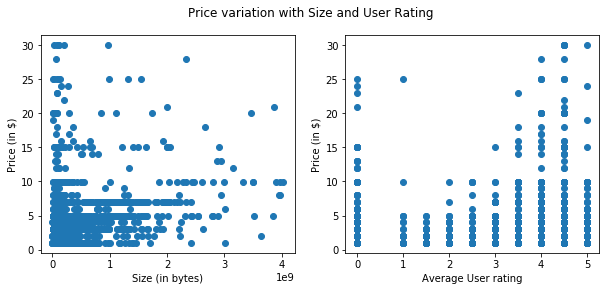

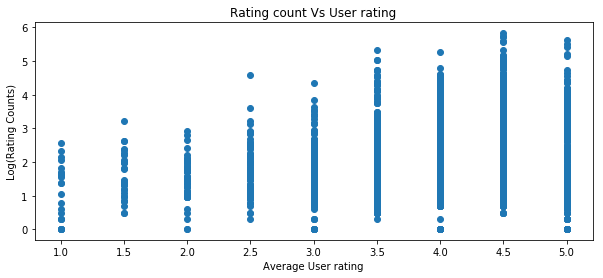

In [12]:
plt.figure(figsize=(10,4))
plt.suptitle('Price variation with Size and User Rating')
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
plt.scatter(paid_apps['size_bytes'],paid_apps['price'])
plt.xlabel('Size (in bytes)')
plt.ylabel('Price (in $)')

plt.subplot(1,2,2)
plt.scatter(paid_apps['user_rating'],paid_apps['price'])
plt.xlabel('Average User rating')
plt.ylabel('Price (in $)')
plt.show()
plt.close()

plt.figure(figsize=(10,4))
plt.scatter(paid_apps['user_rating'],paid_apps['log_rating_count'])
plt.title('Rating count Vs User rating')
plt.xlabel('Average User rating')
plt.ylabel('Log(Rating Counts)')
plt.show()
plt.close()

### Observations:

1. There is no general relation between size of an app with its price.
2. With the increase in average rating, the rating counts increases exponentially.
3. For the apps having price more than 15$, the user rating is more than 3.5 (not considering zero). It may indicate that the rating count of these apps is quite good and it is used by more number of people.
4. Zero rating is of no meaning since its rating count is zero.

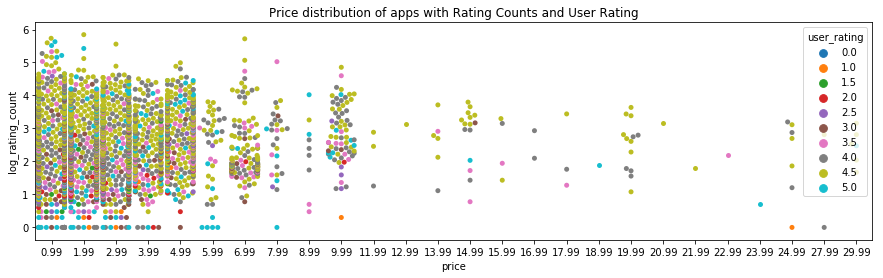

In [13]:
plt.figure(figsize=(15,4))
plt.title('Price distribution of apps with Rating Counts and User Rating')
sns.swarmplot(x='price',y='log_rating_count',hue='user_rating',data=paid_apps);

### Observations:

1. It confirms our above hypothesis that the costlier apps have a better rating count overall and have a good rating.
2. Apps having rating count more than 1000, have mostly average rating of 4.5.

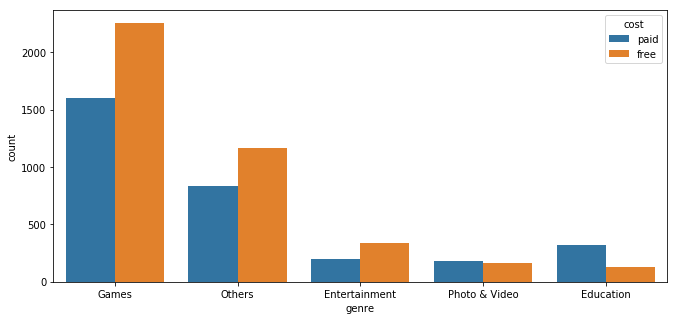

In [14]:
plt.figure(figsize=(11,5))
sns.countplot(x='genre',hue='cost',data=df)

### Observations:

1. There are more number of paid educational apps than free.
2. The number of free apps is significantly more than that of paid apps in case of gaming and entertainment apps.

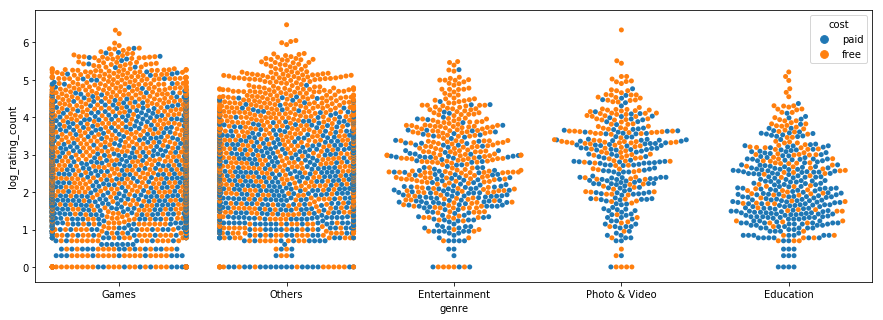

In [15]:
plt.figure(figsize=(15,5))
sns.swarmplot(x='genre',y='log_rating_count',hue='cost',data=df)

### Observations:

1. The free apps in general have a higher rating count as compared to paid apps giving an idea that maximum number of people use free apps.
2. Even in case of education, which has more proportion of paid apps than free, the highest rating count is of free apps.

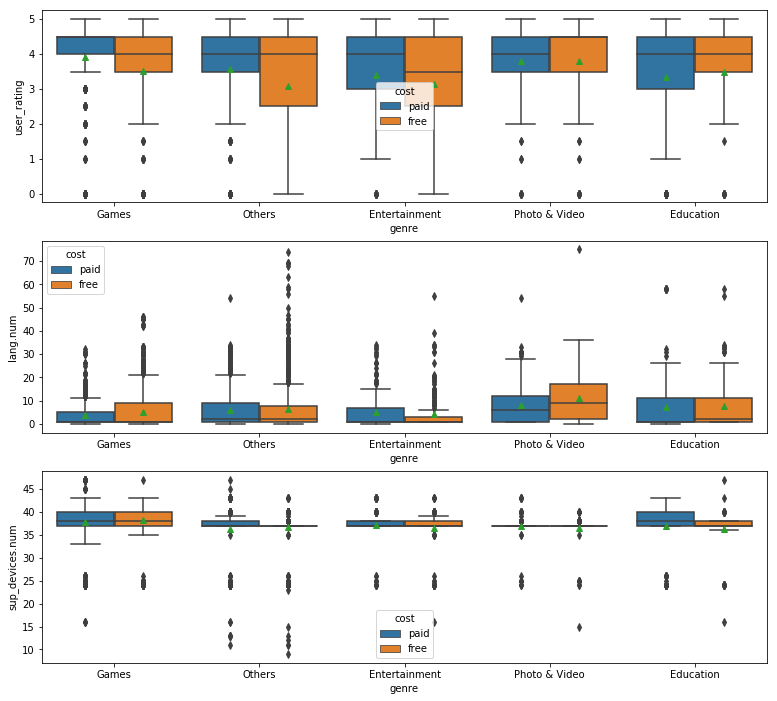

In [16]:
plt.figure(figsize=(13,12))
plt.subplot(3,1,1)
sns.boxplot(x='genre',y='user_rating',hue='cost',data=df,showmeans=True)
plt.subplot(3,1,2)
sns.boxplot(x='genre',y='lang.num',hue='cost',data=df,showmeans=True)
plt.subplot(3,1,3)
sns.boxplot(x='genre',y='sup_devices.num',hue='cost',data=df,showmeans=True)
plt.show()
plt.close()

### Observations:

1. Median of user rating of paid apps is more than that of free apps in case of 'Entertainment' and 'Photo and Video' genre. In the rest of the cases it is same.
2. Average user rating of free apps is less than that of paid apps for all categories except eductaion.
3. Free apps support more number of languages on an average as compared to paid apps for all categories except Entertainment.
4. There is almost no difference in the number of devices supported in case of free or paids apps. One exception is 'Education' where free apps support less number of devices.

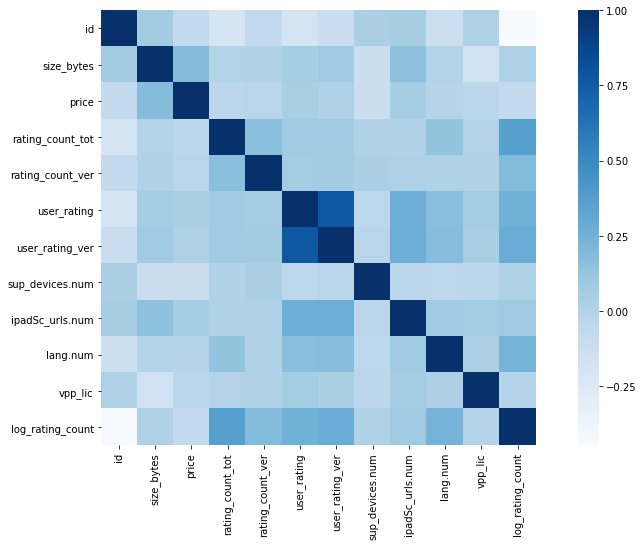

In [17]:
df_num=df.select_dtypes(include=['float','int'])
del df_num['Unnamed: 0']
plt.figure(figsize=(15,8))
sns.heatmap(df_num.corr(),square=True,cmap='Blues')

### Observations:

1. There is not much correlation between columns of the data.
2. There is a good coorelation between average user rating and the user rating for current version. It seems to be quite obvious. That's why, we don't need to look for the ratings of the current version separately.

/home/sanchit/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


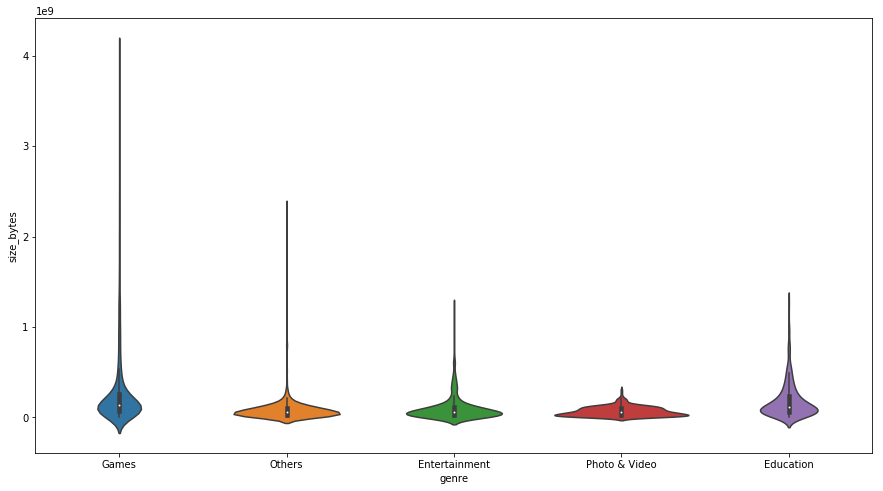

In [18]:
plt.figure(figsize=(15,8))
sns.violinplot(x='genre',y='size_bytes',data=df,showmeans=True)

### Observations:
1. The average size of apps for all genre is almost same.
2. Gaming apps have the maximum size in the app store.

## Summary:

1.  Which genre has the highest number of apps? <br>
    Games

2.  What is the usual price range of apps? <br>
    1$-30$


3.  How does price vary with the number of apps? <br>
    Number of apps dereases exponentially with the increase in price.


4.  Is user rating of paid apps is better than that of free apps? <br>
    Yes, average user rating of paid apps is better than that of free apps for all genre except 'Education'.


5.  Do paid apps support more number of languages? <br>
    No. Free apps support more number of languages than paid apps except in the case of 'Entertainment' apps.


6.  Are there more paid apps than free apps? <br>
    Paid apps are more in number than free apps only for Education.


7.  Are paid educational apps good enough? <br>
    Average user rating of paid educational apps is less than that of free apps. But the total rating count of paid apps is quite less as compared to that of free apps. It may be possible due to the fact that more number of people prefer free apps.


8.  Do most of the people prefer free apps? <br>
    Yes. Maximum people prefer free apps since the total rating count of free apps is in general high as compared to paid apps.


9.  Which category apps are largest in size? <br>
    Average size of apps is same for all category. But few gaming apps have the largest size in apps store.


10. Do paid apps support more devices? <br>
    No. Both, free and paid apps support almost the same number of devices. In case of 'Educational' apps, free apps support less devices. 


11. Does a better rating count leads to a better rating? <br>
    Yes. Maximum apps having rating count more than 1000 have a user rating of 4.5.


12. Do expensive apps have a higher user rating? <br>
    Yes. Apps having price more than 15$ have usually good rating.


13. What is the relative proportion of free apps on app store? <br>
    56.35\% apps on apps store are free
    
    
14. Which apps are exceptionally priced in app store? <br>
    The most exceptionally priced apps are of education.


15. Paid apps of which genre start from a higher price? <br>
    Educational apps